In [17]:

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn
!pip3 install tqdm
!pip3 install torch
!pip3 install scikit-plot
!pip3 install imblearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [1]:
#https://github.com/alod83/data-science/blob/master/DataAnalysis/Time%20Series%20Analysis.ipynb
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform#, loguniform
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import time
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn import linear_model


import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
import time
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

In [2]:
curr_path = str(os.getcwd())
path_data = curr_path + '/data/train.csv'
file_extension = path_data.split(".")[-1]

In [3]:
if file_extension == 'xlsx':
    df = pd.read_excel(path_data, engine='openpyxl')
elif file_extension == 'xls':
    df = pd.read_excel(path_data)
elif file_extension == 'csv':
    df = pd.read_csv(path_data) #file.read()
df['time'] = (df['Hour']*60) + df['Minutes']
df

Unnamed: 0  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0              0    22       26    119.910995   242.838324   -316.819222   
1              1    10       16    -90.790536  -269.470767   -182.581844   
2              2    21       42    -20.028003  -147.070212     50.280872   
3              3    21       17    -21.258567     0.467070    -86.164153   
4              4    18       16    -58.154501   -13.051195   -156.501167   
...          ...   ...      ...           ...          ...           ...   
6996        6996    21        0      6.576106   301.050638    146.682819   
6997        6997    18       57     -6.169382  -317.652257   -161.644320   
6998        6998    22       47     -7.289684  -406.732525   -212.097250   
6999        6999    18       14    -92.317105  -191.555040     88.371271   
7000        7000    21       31    -72.083585   -11.434977    -52.961743   

      Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  time  
0            250.195048        -53.547777        -112.049983       2  1346  
1             95.394941         37.291944          48.525180       0   616  
2            -90.750386        -50.476556          85.399009       1  1302  
3            -21.813529       -209.256006          16.291882       0  1277  
4             48.392938       -110.008860         -10.285138       2  1096  
...                 ...               ...                ...     ...   ...  
6996        -209.480741       -129.776336         -51.226256       1  1260  
6997         248.055724       -112.626344          99.463913       0  1137  
6998         248.745127        116.893077          32.806150       0  1367  
6999          38.728565        -39.050466          20.356711       0  1094  
7000         -72.696385        145.299227        -143.856243       1  1291  

[7001 rows x 11 columns]

In [19]:
def get_path(filename: str = 'train.csv'):
    curr_path = str(os.getcwd())
    path_data = curr_path + '/data/' + filename
    file_extension = path_data.split(".")[-1]
    return path_data, file_extension

def get_dataframe(path_data: str, file_extension: str) -> pd.DataFrame:
    if file_extension == 'xlsx':
        df = pd.read_excel(path_data, engine='openpyxl')
    elif file_extension == 'xls':
        df = pd.read_excel(path_data)
    elif file_extension == 'csv':
        df = pd.read_csv(path_data)
    return df 

In [50]:
path, extension = get_path('train.csv')
df = get_dataframe(path, extension)
df['time'] = (df['Hour']*60) + df['Minutes']###
y_trainM = df["Insect"]
X_trainM = df.drop("Insect", axis="columns")
df.head()
df.isnull().values.any()

False

In [51]:
#MORE

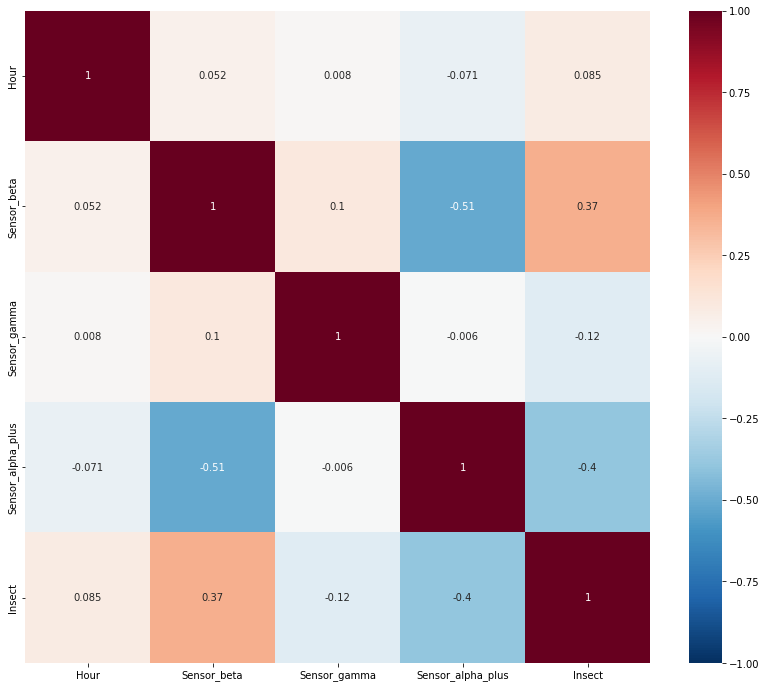

In [52]:
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus","Insect"]]
df_train = select_columns.copy()
df_train
correlation = df_train.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [60]:
#df_train['Sensor_alpha_plus'] * df_train['Sensor_beta']
#df_train['x'] = (df_train['Sensor_alpha_plus'] + df_train['Sensor_beta'])**2#df_train['Sensor_alpha_plus'] * df_train['Hour']
#df_train['z'] = (df_train['Hour'])**2 * df_train['Sensor_beta']#df_train['Sensor_alpha_plus'] * df_train['Sensor_gamma']
#df_train['Beta3'] = df_train['Sensor_beta']**3
#df_train['Gamma-Betta3'] = (df_train['Sensor_beta']**3 - df_train['Sensor_gamma']**3)
df_train['Gamma-betta'] = (df_train['Sensor_beta'] - df_train['Sensor_gamma'])
df_train['x'] = (df_train['Sensor_beta'] - df_train['Sensor_gamma']- df_train['Sensor_alpha_plus'])
df_train['z'] = (df_train['Sensor_beta'] - (df_train['Sensor_gamma']*5)- df_train['Sensor_alpha_plus'])

In [64]:
df_train.shape
from scipy import stats
df_train[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_train.shape

(7001, 8)

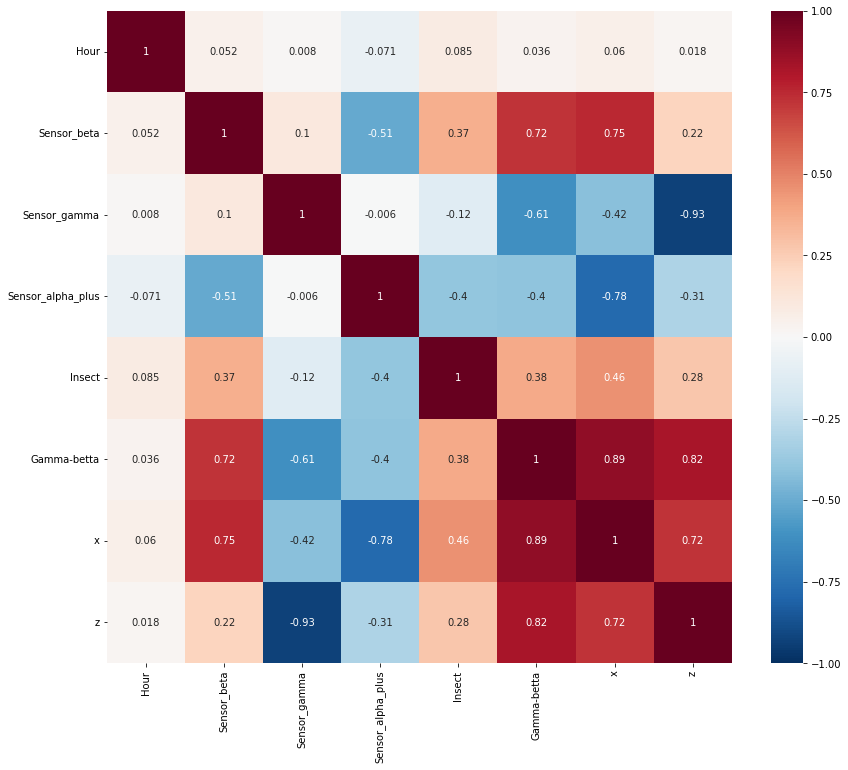

In [61]:
correlation = df_train.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [9]:
path_test, extension_test = get_path('test_x.csv')
df_test = get_dataframe(path_test, extension_test)
df_test.head()

Unnamed: 0  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0        7000    21       31    -72.083585   -11.434977    -52.961743   
1        7001    21        3   -193.619980    40.137081     85.419244   
2        7002    22       31     42.578382   -51.613402    125.055611   
3        7003    21       25    -64.150951   287.306752    -70.965473   
4        7004    18       11    193.750787   -61.989533   -110.347066   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  
0         -72.696385        145.299227        -143.856243  
1         -26.266801       -125.391237          80.904973  
2         182.136746         -9.726951        -114.913402  
3          13.789738         38.187260         137.761691  
4         -16.864786        148.541916         232.424616

In [108]:
!pip3 install statsmodels
!pip3 install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 2.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 3.0 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installatio

Text(0.5, 0.98, 'blue: setosa, green: versicolor, red: virginica, orange: g, pink: alpha')

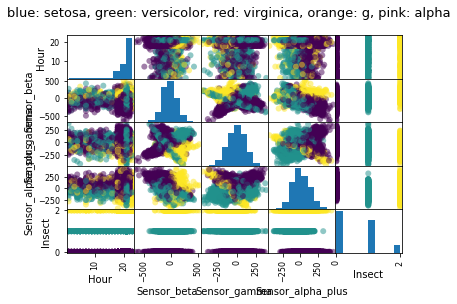

In [38]:
import matplotlib.pyplot as plt

import pandas
from pandas import plotting

from statsmodels.formula.api import ols
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus","Insect"]]
df_train = select_columns.copy()
df_y_train = df['Insect']
df_train
# Express the names as categories
categories = pd.Categorical(df_y_train)

# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(df_train, c=categories.codes, marker='o')

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica, orange: g, pink: alpha", size=13)

In [36]:
df

Unnamed: 0  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0              0    22       26    119.910995   242.838324   -316.819222   
1              1    10       16    -90.790536  -269.470767   -182.581844   
2              2    21       42    -20.028003  -147.070212     50.280872   
3              3    21       17    -21.258567     0.467070    -86.164153   
4              4    18       16    -58.154501   -13.051195   -156.501167   
...          ...   ...      ...           ...          ...           ...   
6996        6996    21        0      6.576106   301.050638    146.682819   
6997        6997    18       57     -6.169382  -317.652257   -161.644320   
6998        6998    22       47     -7.289684  -406.732525   -212.097250   
6999        6999    18       14    -92.317105  -191.555040     88.371271   
7000        7000    21       31    -72.083585   -11.434977    -52.961743   

      Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  time  
0            250.195048        -53.547777        -112.049983       2  1346  
1             95.394941         37.291944          48.525180       0   616  
2            -90.750386        -50.476556          85.399009       1  1302  
3            -21.813529       -209.256006          16.291882       0  1277  
4             48.392938       -110.008860         -10.285138       2  1096  
...                 ...               ...                ...     ...   ...  
6996        -209.480741       -129.776336         -51.226256       1  1260  
6997         248.055724       -112.626344          99.463913       0  1137  
6998         248.745127        116.893077          32.806150       0  1367  
6999          38.728565        -39.050466          20.356711       0  1094  
7000         -72.696385        145.299227        -143.856243       1  1291  

[7001 rows x 11 columns]

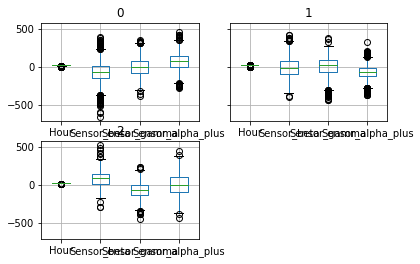

In [116]:
import pandas

# Box plots of different columns for each gender
groupby_gender = df_train.groupby('Insect')
groupby_gender.boxplot(column=["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"])

plt.show()


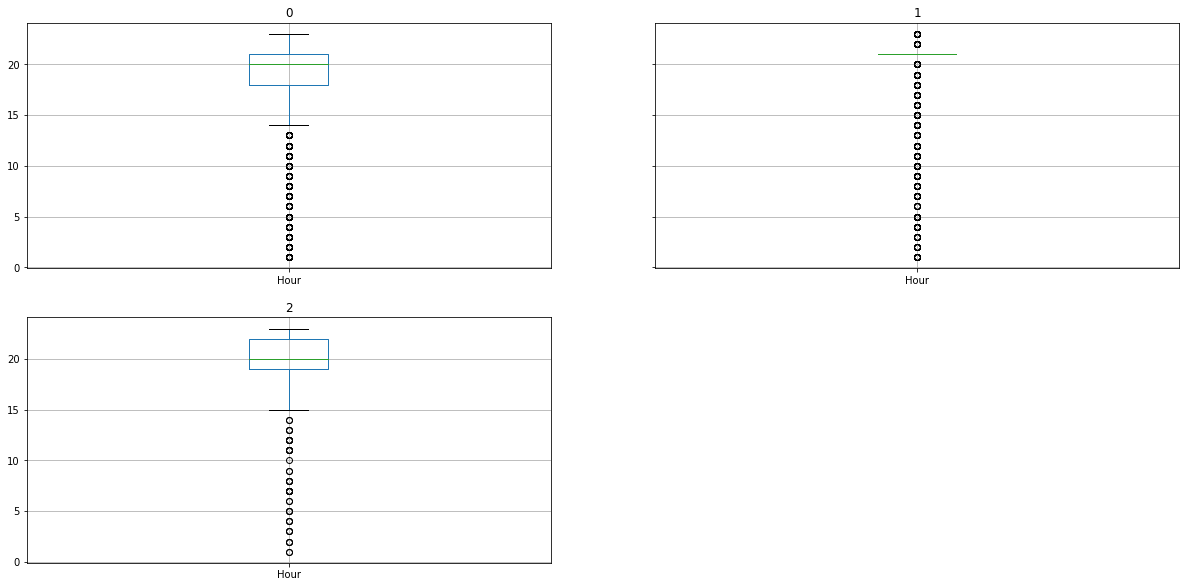

In [119]:
plt.rcParams["figure.figsize"] = (20,10)
groupby_gender = df_train.groupby('Insect')
groupby_gender.boxplot(column=["Hour"])

plt.show()



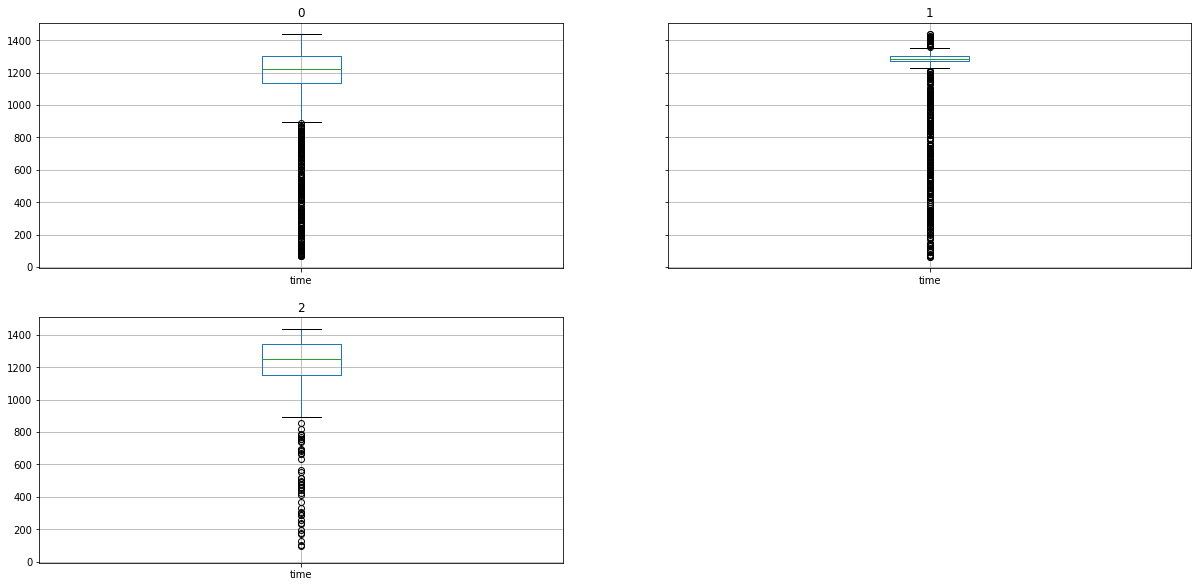

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
groupby_gender = df.groupby('Insect')
groupby_gender.boxplot(column=["time"])

plt.show()



In [59]:
path, extension = get_path('train.csv')
df = get_dataframe(path, extension)
y = df["Insect"]
X = df.drop("Insect", axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [84]:
###
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
df_y_train = df['Insect']

#X = np.asarray(df_train)
#y = np.asarray(df_y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_y_train, test_size=0.2, random_state=2)

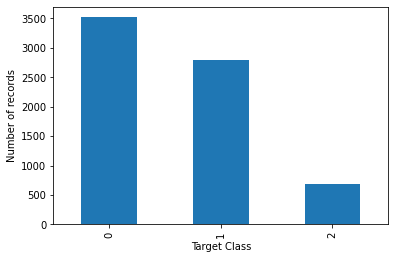

In [85]:
count = df_y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

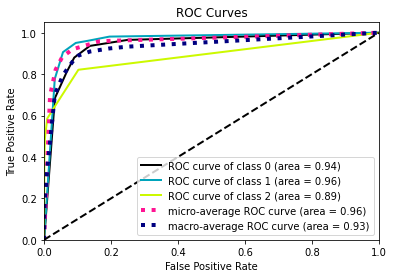

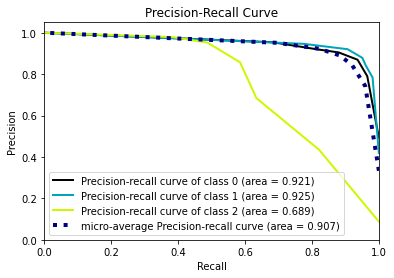

In [86]:
from sklearn.neighbors import KNeighborsClassifier#,DecisionTreeClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

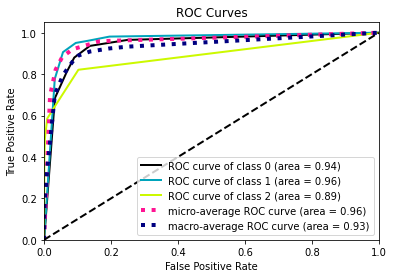

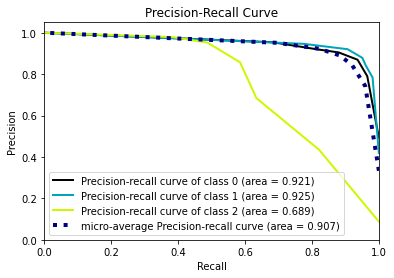

In [53]:
###LOW DATA
from sklearn.neighbors import KNeighborsClassifier#,DecisionTreeClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [87]:
import numpy as np
n_samples = count.median().astype(np.int64)
n_samples

2793

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

In [90]:

from imblearn.under_sampling import ClusterCentroids
#under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(df_train,df_y_train,n_samples,t='majority'))
#X_under, y_under = under_sampler.fit_resample(df_train,df_y_train)
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)


In [91]:
print(type(X_train),type(y_train))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


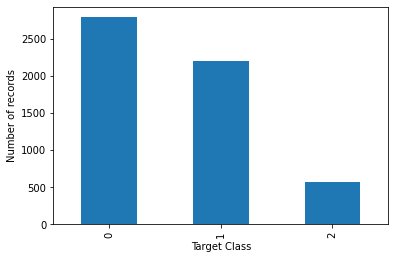

In [92]:
count = y_under.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [93]:
from imblearn.over_sampling import SMOTE
#over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
#X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

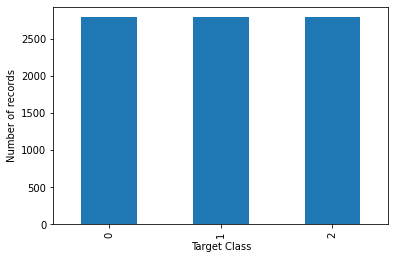

In [94]:
count = y_bal.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

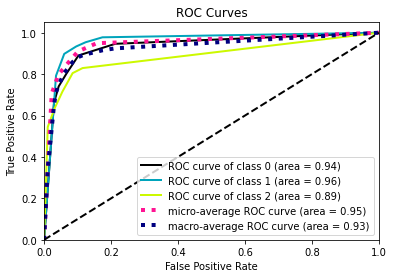

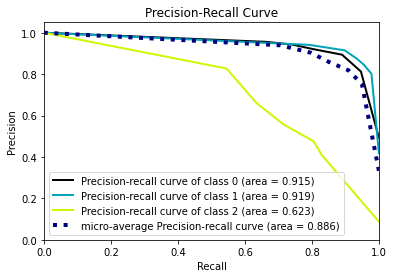

In [95]:
model = KNeighborsClassifier()
model.fit(X_bal, y_bal)
y_score = model.predict_proba(X_test)

y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [96]:
from sklearn.utils import class_weight

classes = np.unique(y_train)
print(classes)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
weights = dict(zip(classes,cw))

[0 1 2]


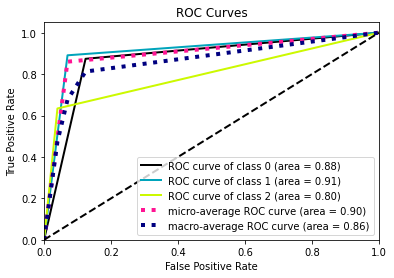

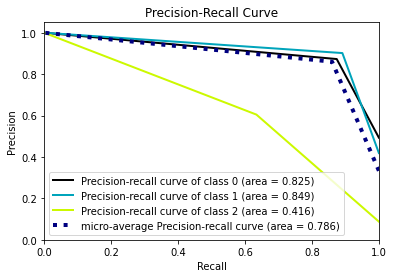

In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

y_pred = model.predict(X_test)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        #x = self.layer3(x) ##aqui

        return x

import tqdm

EPOCHS  = 3000
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

In [8]:
def save_df_local(df: pd.DataFrame, compressed: bool=False, output_name: str='results.csv', create_folder: bool=False):
    if create_folder:
        os.makedirs('results', exist_ok=True) #'folder/subfolder'
        output_name = 'results/' + output_name

    if compressed:
        name_compressed = output_name.split(".")[0] + '.zip'
        compression_opts = dict(method='zip',archive_name=output_name.split("/")[-1])  
        df.to_csv(name_compressed, index=False,compression=compression_opts) 
    else:
        df.to_csv(output_name,index=False) 
    return
save_df_local(df,True, 'res.csv', True)

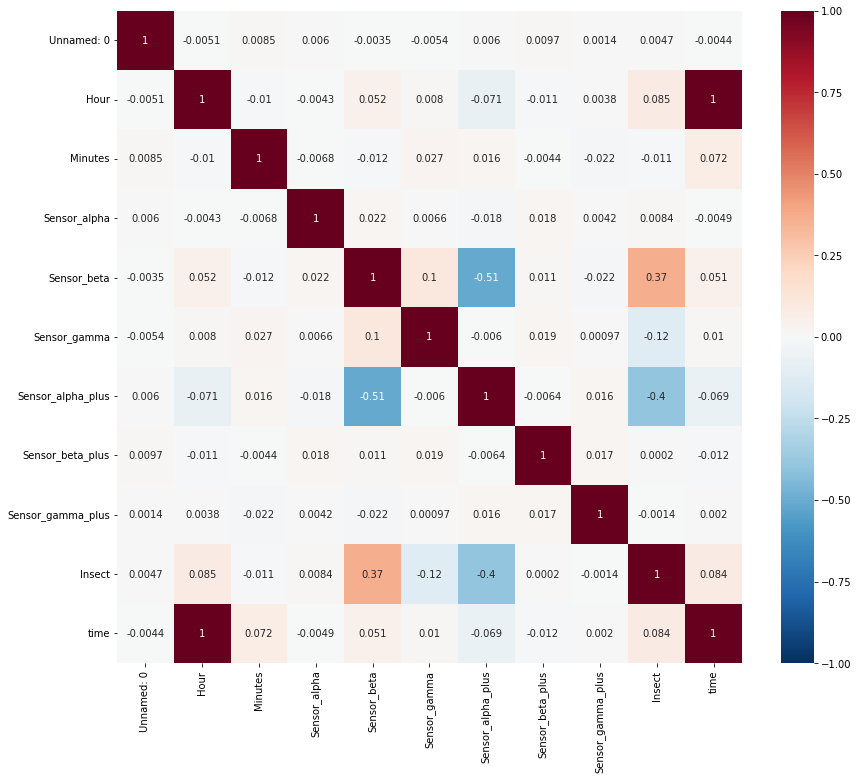

In [10]:
correlation = df.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [111]:
c = df.corr().abs()['Insect']
#col = c.drop("Insect", axis="columns")
cc = c[c!=1]
ccc = cc[cc>0.05]
list(ccc.index)

['Hour', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus']

In [91]:
c[c.Insect > 0.05 & c.Insect != 1]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [82]:
s = c.unstack()
#df.corr().unstack().sort_values().drop_duplicates()

Sensor_beta        Sensor_alpha_plus   -0.512785
Insect             Sensor_alpha_plus   -0.397456
                   Sensor_gamma        -0.121449
Sensor_alpha_plus  Hour                -0.070914
Sensor_gamma_plus  Sensor_beta         -0.022064
                   Minutes             -0.021566
Sensor_alpha       Sensor_alpha_plus   -0.018265
Sensor_beta        Minutes             -0.011605
Insect             Minutes             -0.011447
Sensor_beta_plus   Hour                -0.011380
Hour               Minutes             -0.010428
Minutes            Sensor_alpha        -0.006835
Sensor_alpha_plus  Sensor_beta_plus    -0.006376
Sensor_gamma       Sensor_alpha_plus   -0.005966
Unnamed: 0         Sensor_gamma        -0.005398
Hour               Unnamed: 0          -0.005147
Sensor_beta_plus   Minutes             -0.004444
Sensor_alpha       Hour                -0.004315
Unnamed: 0         Sensor_beta         -0.003516
Sensor_gamma_plus  Insect              -0.001430
Insect             S

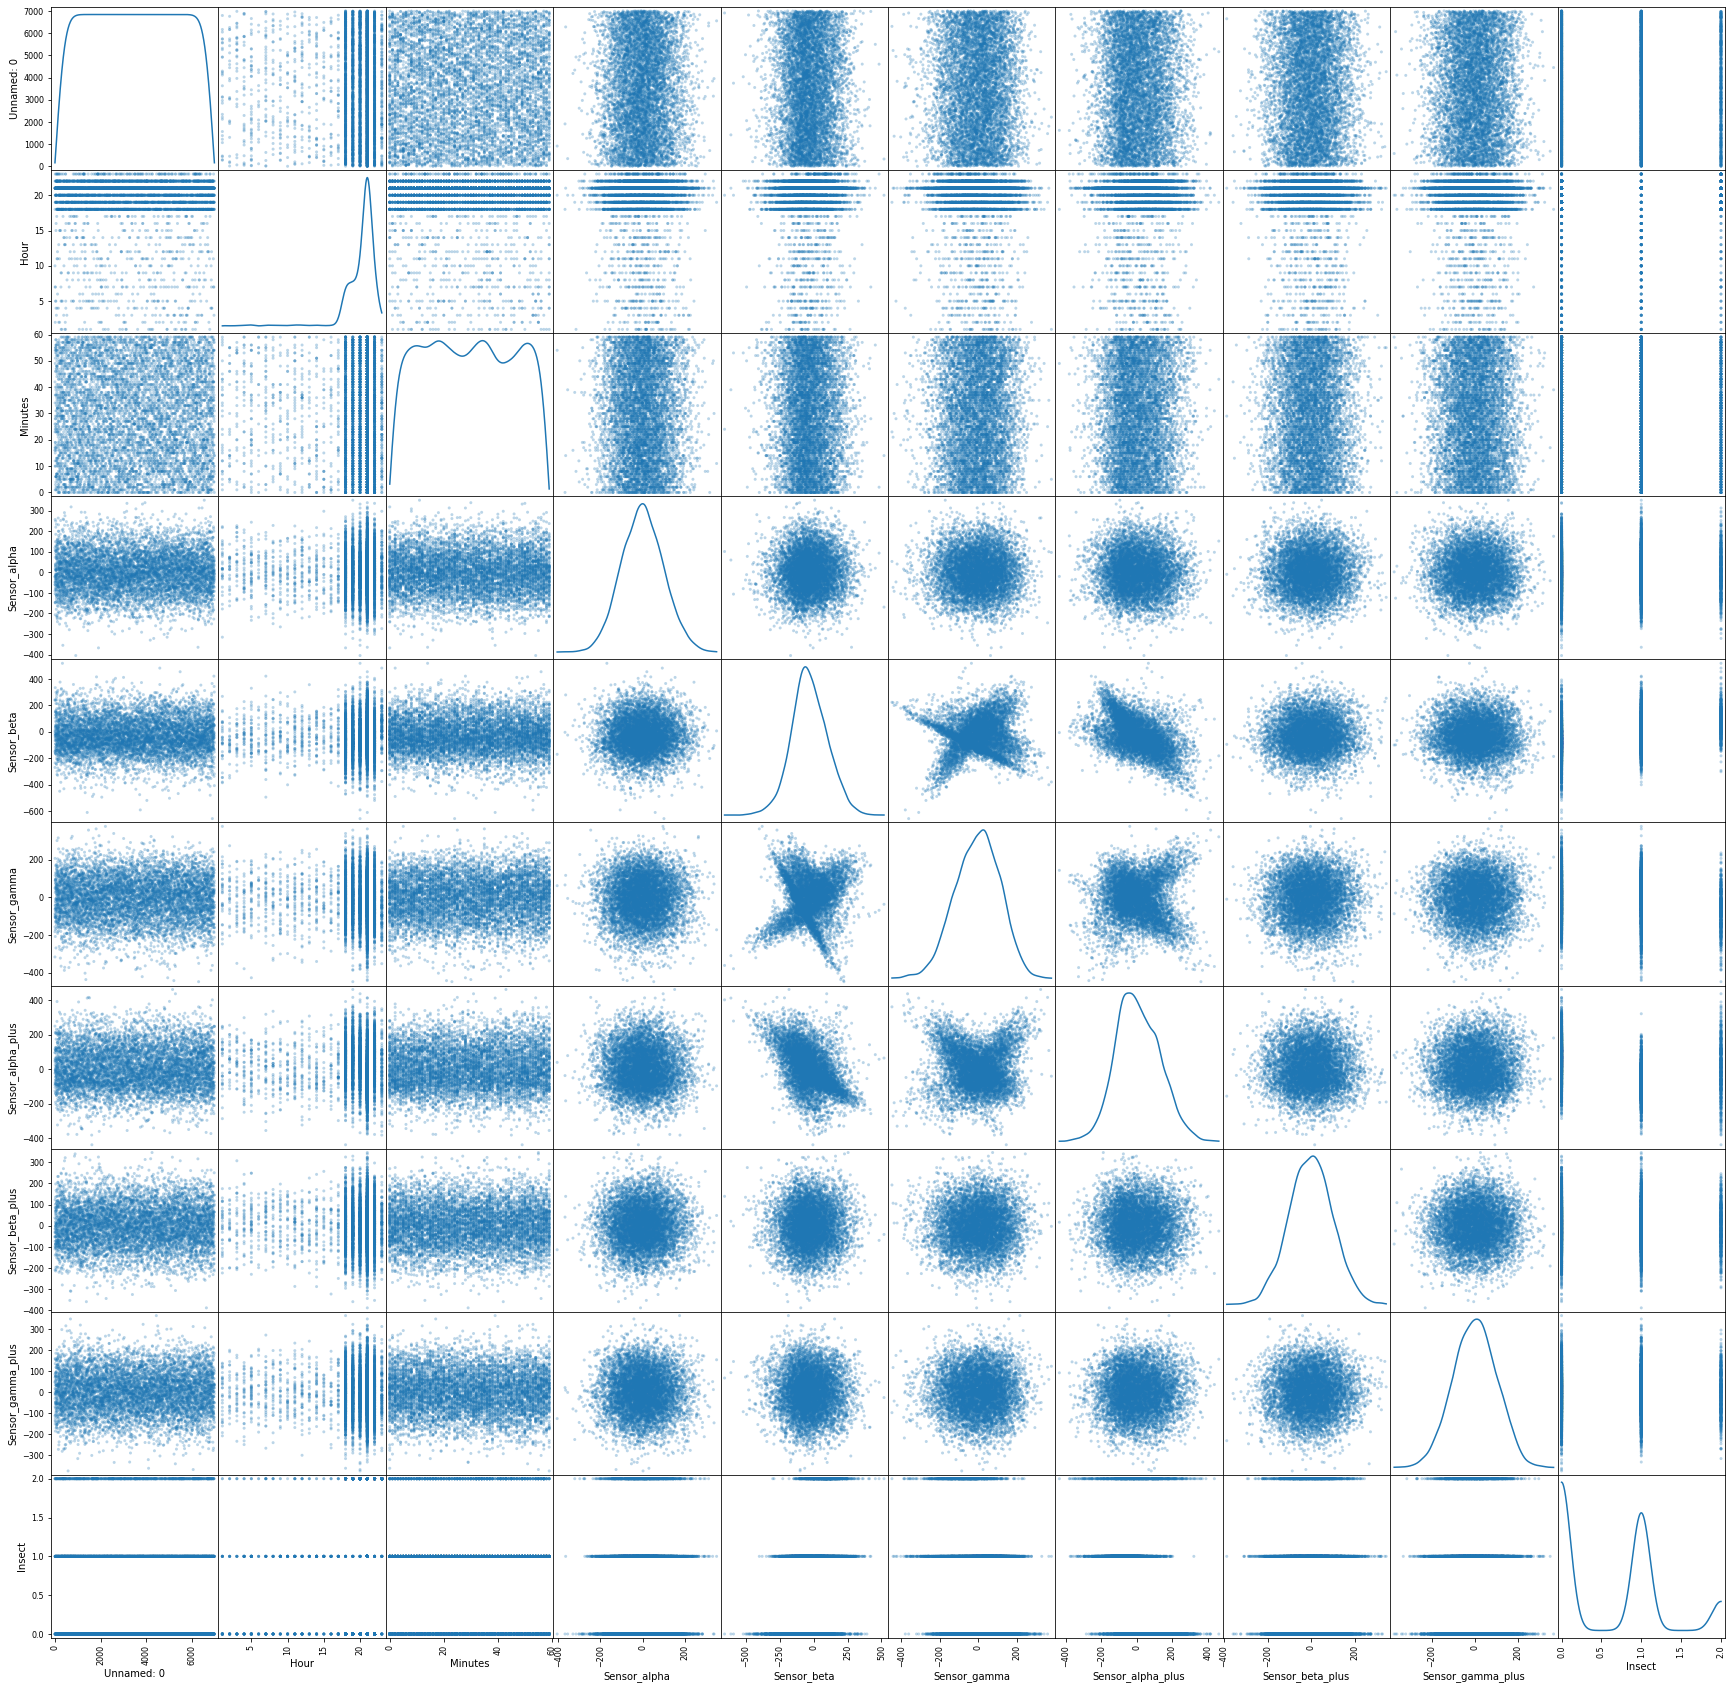

In [10]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

In [65]:
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y = df['Insect']


In [66]:
features_raw = StandardScaler().fit_transform(df_train)



In [67]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [70]:
def entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X_train: caracteristiques entrenament
       - y_train: etiqueta entrenament
       - X_test: caracteristiques test
       - y_test: etiqueta test
    '''
    start = time.time()
    results = {}

    """
    Entrenar el model tenint en compte el 'sample_size' 
    """
    size = int(sample_size * X_train.shape[0])
    Xs_train = X_train[:size]
    ys_train = y_train[:size]
    model.fit(Xs_train, ys_train)

    """
    Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
    """
    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)
    
    """
    Calcular el accuracy i el F1-score del train i del test
    """
    results['time'] = time.time()-start
    results['acc_train'] = accuracy_score(y_train, y_predict_train) 
        # == model.score(X_train, y_train) == f1_score(y_train, y_predict_train, average='micro')
    results['acc_test'] = accuracy_score(y_test, y_predict_test)
    #results['pr_train'] = precision_score(y_train, y_predict_train) 
    #results['pr_test'] = precision_score(y_test, y_predict_test)
    results['F1_train_macro'] = f1_score(y_train, y_predict_train, average='macro')
    results['F1_test_macro'] = f1_score(y_test, y_predict_test, average='macro')
    #results['F1_train_none'] = f1_score(y_train, y_predict_train, average=None)
    #results['F1_test_none'] = f1_score(y_test, y_predict_test, average=None)
    results['coef_'] = model.coef_[0]
    results['intercept_'] = model.intercept_[0]
    results['bias'] = (results['acc_train'] + results['acc_test'])/2
    results['var'] = results['acc_train'] - results['acc_test']

    #print("{} s'ha entrenat amb el {}% de mostres.".format(model.__class__.__name__, sample_size * 100))
    
    return results

In [71]:
clf = LogisticRegression(random_state = 0)# model
samples = 0.1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)

print( results['var'], results['bias'])



0.004282272866319992 0.7473231492811256


In [72]:
rows_list = []
for i in range(1,101):
    """Variem paràmetres C i l1_ratio segons i/100 i guardem tots els resultats"""
    clf = LogisticRegression(random_state = 0,penalty = 'elasticnet', solver = 'saga', C = i/100, l1_ratio = 0.1)# model
    samples = 0.1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
    results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
    results['iter'] = i
    results['C'] = i/100
    rows_list.append(results)

df = pd.DataFrame(rows_list)

<AxesSubplot:xlabel='C'>

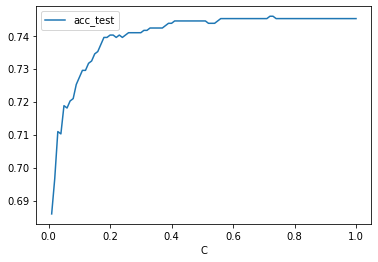

In [73]:
plot_df = df.drop(['coef_'], axis = 1)
plot_df.plot.line(x='C', y='acc_test')




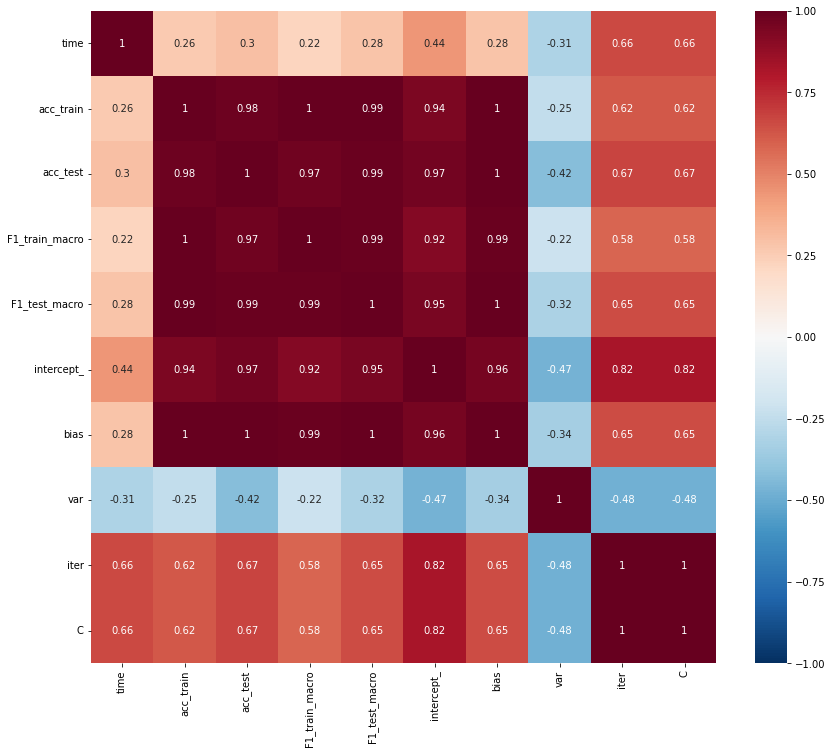

In [74]:
correlation = plot_df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [75]:
param = {}
param['1'] = {'penalty' : 'l1', 'solver' : 'saga'}
param['2'] = {'penalty' : 'l2', 'solver' : 'saga'}
param['3'] = {'penalty' : 'elasticnet', 'solver' : 'saga'}
param['4'] = {'penalty' : 'none', 'solver' : 'saga'}
param['5'] = {'penalty' : 'l1', 'solver' : 'liblinear'}
param['6'] = {'penalty' : 'l2', 'solver' : 'liblinear'}
print(param['6'])
rows_list = []
for name in range(1,7):
    """Utilitzem les convinacions de paràmetres que hem definit"""
    for i in range(1,101):
        """Variem paràmetres C i segons i/100 i guardem tots els resultats"""
        if param[str(name)]['penalty'] == 'elasticnet': 
            clf = LogisticRegression(random_state = 0,penalty = param[str(name)]['penalty'], 
                                     solver = param[str(name)]['solver'], 
                                     C = i/100, l1_ratio = 0.5)# model
        else:
            clf = LogisticRegression(random_state = 0,penalty = param[str(name)]['penalty'],
                                     solver = param[str(name)]['solver'], C = i/100)# model
        samples = 0.1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
        results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
        results['iter'] = i
        results['C'] = i/100
        results['penalty'] = param[str(name)]['penalty']
        results['solver'] = param[str(name)]['solver']
        rows_list.append(results)

df = pd.DataFrame(rows_list)

{'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Fram

/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Fram

/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Fram

In [76]:
df[df.C == 0.1]

time  acc_train  acc_test  F1_train_macro  F1_test_macro  \
9    0.004461   0.726786  0.721627        0.626860       0.611016   
109  0.003115   0.737143  0.726624        0.646329       0.619437   
209  0.005550   0.734464  0.724483        0.633491       0.613221   
309  0.005210   0.750893  0.744468        0.683789       0.667434   
409  0.001716   0.712321  0.708066        0.574622       0.543885   
509  0.001501   0.721429  0.718059        0.620122       0.600628   

                                                 coef_  intercept_      bias  \
9                [-0.08315486478302717, 0.0, 0.0, 0.0]    0.769392  0.724207   
109  [-0.1485424514164335, -0.3871241180179036, 0.2...    0.813932  0.731883   
209  [-0.12051486988249882, -0.031062009368200964, ...    0.779667  0.729473   
309  [-0.21999069921546438, -0.524647142458682, 0.2...    1.010632  0.747681   
409  [-0.07179603661319657, -0.2992918717268075, 0....    0.000000  0.710194   
509  [-0.1566929332257816, -0.3702165430446203, 0.2...   -0.063267  0.719744   

          var  iter    C     penalty     solver  
9    0.005158    10  0.1          l1       saga  
109  0.010519    10  0.1          l2       saga  
209  0.009982    10  0.1  elasticnet       saga  
309  0.006425    10  0.1        none       saga  
409  0.004256    10  0.1          l1  liblinear  
509  0.003370    10  0.1          l2  liblinear

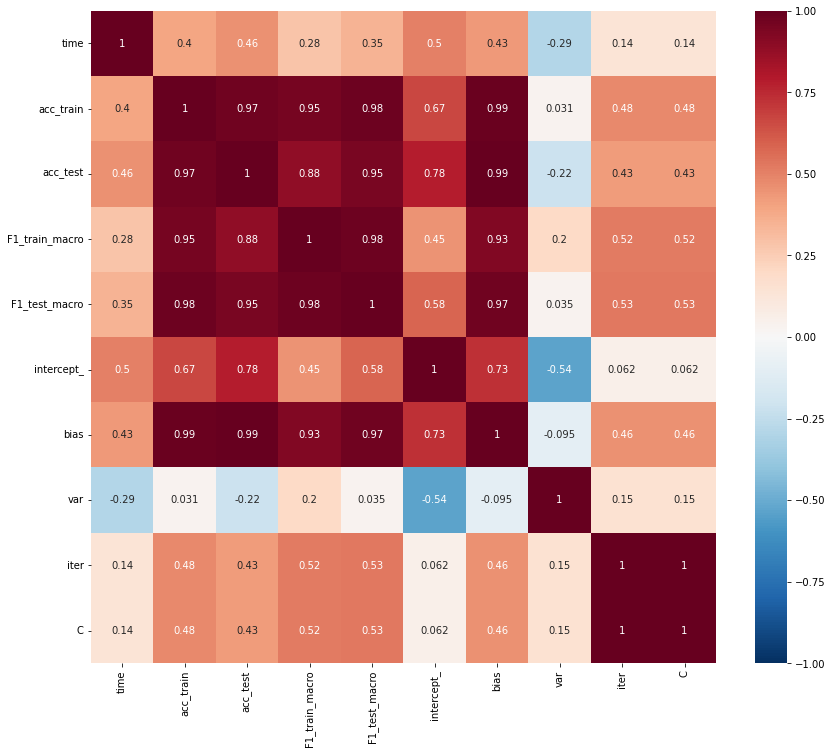

In [77]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [78]:
""" erros de bias molt alt"""
samplepl = {}
samplepl['ac_test'] = []
samplepl['ac_train'] = []
iterpl = {}
iterpl['ac_test'] = []
iterpl['ac_train'] = []


for i in range(1,101):
    clf = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'saga', C = 0.1) # model
    results = entrena_prediu_evalua(clf, i/100, X_train, y_train, X_test, y_test)
    samplepl['ac_test'].append(results['acc_test'])
    samplepl['ac_train'].append(results['acc_train'])
    
for i in range(1,101):
    clf = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'saga', C = 0.1, max_iter=i) # model
    results = entrena_prediu_evalua(clf, 1, X_train, y_train, X_test, y_test)
    iterpl['ac_test'].append(results['acc_test'])
    iterpl['ac_train'].append(results['acc_train'])



/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Fram

[Text(0.5, 0, 'Samples % '), Text(0, 0.5, 'accuracy')]

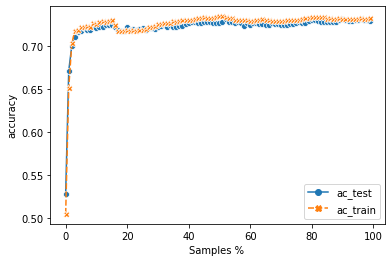

In [79]:
info = pd.DataFrame(samplepl)
ax = sns.lineplot(data=info, markers=True)
ax.set(xlabel="Samples % ", ylabel="accuracy")



[Text(0.5, 0, 'Max Iterations '), Text(0, 0.5, 'accuracy')]

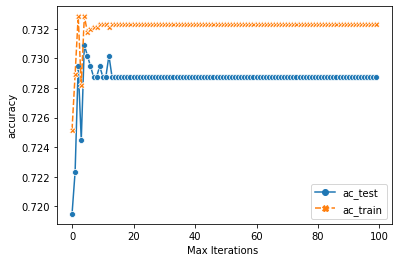

In [80]:
info = pd.DataFrame(iterpl)
ax = sns.lineplot(data=info, markers=True)
ax.set(xlabel="Max Iterations ", ylabel="accuracy")



[Text(0.5, 0, 'Samples % '), Text(0, 0.5, 'accuracy')]

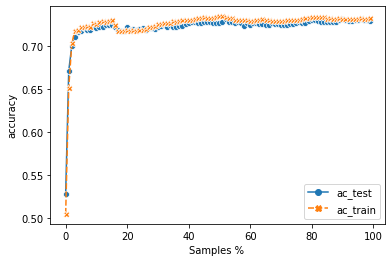

In [81]:
info = pd.DataFrame(samplepl)
ax = sns.lineplot(data=info, markers=True)
ax.set(xlabel="Samples % ", ylabel="accuracy")




In [82]:
degreepl = {}
degreepl['ac_test'] = []
degreepl['ac_train'] = []
degreepl['degree'] = []

for i in range (1,6):
    numerical_preprocess = Pipeline([
    ( 'poly', PolynomialFeatures(degree=i, include_bias=False) ),
    ( 'std_scaler', StandardScaler() )
    ])

    full_pipeline = Pipeline([
        ("preprocess", numerical_preprocess),
        ('LR', LogisticRegression(fit_intercept=True))
    ])
    full_pipeline.fit(X_train, y_train)
    degreepl['ac_train'].append(full_pipeline.score(X_train, y_train))
    degreepl['ac_test'].append(full_pipeline.score(X_test, y_test))
    degreepl['degree'].append(i)



/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

[Text(0.5, 0, 'Degree '), Text(0, 0.5, 'accuracy')]

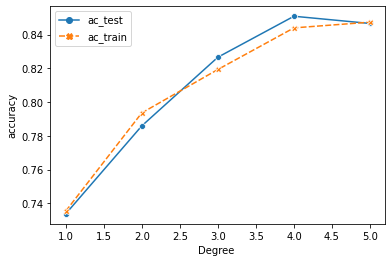

In [83]:
info = pd.DataFrame(degreepl)
new = info.set_index('degree')
ax = sns.lineplot(data=new, markers=True)
ax.set(xlabel="Degree ", ylabel="accuracy")

In [87]:


# X is the 10x10 Hilbert matrix
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    clf = LogisticRegression(random_state = 0, penalty = 'l2', solver = 'saga', C = a) # model
    results = entrena_prediu_evalua(clf, 1, X_train, y_train, X_test, y_test)
    coefs.append(results['coef_'])

/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Fram

/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/Cellar/python@3.9/3.9.12/Fram

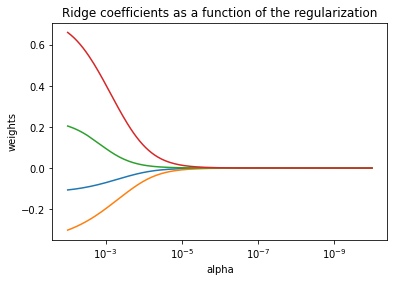

In [88]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [89]:


SVM

NameError: name 'SVM' is not defined

In [96]:
start = time.time()
#clfL = make_pipeline(StandardScaler(), LinearSVC())
clfL = make_pipeline(StandardScaler(), SVC(C=1,kernel="linear"))
clfL.fit(X_train, y_train)
y_train_predL = clfL.predict(X_train)
y_train_scrL = clfL.decision_function(X_train) 
y_test_scrL = clfL.decision_function(X_test) 


"""   DESCREIURE PARÀMETRES"""

accuracy_trainL = accuracy_score(y_train, y_train_predL)
y_test_predL = clfL.predict(X_test)
accuracy_testL = accuracy_score(y_test, y_test_predL)

print("Time is {} ".format(time.time()-start))
print("The accuracy on training is {}".format(accuracy_trainL))
print("The accuracy on test is {}".format(accuracy_testL))

Time is 1.807560920715332 
The accuracy on training is 0.7614285714285715
The accuracy on test is 0.7544610992148465


Text(0.5, 1.0, 'Multiclass SVM train')

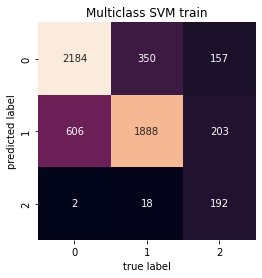

In [97]:

mat = confusion_matrix(y_train, y_train_predL)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Multiclass SVM train')



In [102]:
X = X_train
y = y_train

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])

n_classes = 3 #y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC  class {0} (a = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

In [18]:
def entrena_crossvalida(model, X, y, k_folds, tp = 'binary'): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X: caracteristiques entrenament
       - y: etiqueta entrenament
       - k_folds: número de folds d'entrenament
    '''
    
    results = { "elapsed": [], "train_accuracy": [],"train_f1_score":[], "train_ap":[],
               "val_accuracy":[],"val_f1_score":[], "val_ap":[],"elapsed":[]}

    """
    Inicialitza el FOLD objecte (i.e. KFold) amb k_folds. Cal fer shuffle a les dades?
    """
    kf = KFold(n_splits=k_folds)
    
    """
    Itera les dades per cada fold:
    """
    for i, (train_index, val_index) in tqdm(enumerate(kf.split(X))):
        t_i = time.time()
        print("CROSSVALIDANT FOLD {}".format(i))
        X_train, X_val = X.loc[train_index, :], X.loc[val_index, :]
        #X_train, X_val = X[train_index], X[val_index]

        y_train, y_val = y[train_index], y[val_index]
 
        """
        Entrena el model amb X_train i y_train:
        """

        model.fit(X_train, y_train)

        """
        Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
        """
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        score_train = model.decision_function(X_train)
        score_val = model.decision_function(X_val)
        """
        Calcular el accuracy i el F1-score del train i del test
        """
        if tp == 'binary':
            results["train_f1_score"].append(f1_score(y_train, pred_train))
            results["train_ap"].append(precision_score(y_train, pred_train))
            results["val_f1_score"].append(f1_score(y_val, pred_val))
            results["val_ap"].append(precision_score(y_val, pred_val))
        results["val_accuracy"].append(accuracy_score(y_val, pred_val))
        results["train_accuracy"].append(accuracy_score(y_train, pred_train))
        results["elapsed"].append(time.time() - t_i)
        #results["scr_train"] = score_train
        #results["scr_val"] = score_val


    results["accuracy_mean"] = np.mean(results["val_accuracy"])
    results["accuracy_std"] = np.std(results["val_accuracy"])
    
    print("El model {} ha té un accuracy promig en {} folds de {} +- {}.".format(model.__class__.__name__, 
                                                                                 k_folds,
                                                                                 results["accuracy_mean"],
                                                                                 results["accuracy_std"]))
    return results
 

In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.1,kernel="linear")

entrena_crossvalida(model, X_trainM, y_trainM, k_folds=5, tp = 'multi')




0it [00:00, ?it/s]

CROSSVALIDANT FOLD 0


In [ ]:


model = SVC()
distributions = dict(C=uniform(loc=0.001, scale=10),
                     kernel=['poly', 'rbf','linear'],
                     gamma=uniform(loc=0.001, scale=10),
                     degree= [2,3,4,5])

clf = RandomizedSearchCV(model, distributions, random_state=0, n_iter=10)
search = clf.fit(X_trainM, y_trainM)

In [ ]:
print("BEST PARAMS: {}".format(search.best_params_))
print("BEST SCORE: {}".format(search.best_score_))

In [ ]:
#param_grid = {'C': uniform(loc=0.001, scale=10), 'gamma': uniform(loc=0.001, scale=10), 'kernel': ['rbf', 'linear','poly','sigmoid'], 
 #             'degree' : [2,3,5,7]} 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf','sigmoid'], 'degree':[3,4]} 
#kernel linear
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=4) #refit=True,verbose=4
grid.fit(X_trainM, y_trainM) # combinacions valides





Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=rbf;, score=0.502 total time=   2.3s
[CV 2/5] END C=0.1, degree=3, gamma=1, kernel=rbf;, score=0.503 total time=   2.1s
[CV 3/5] END C=0.1, degree=3, gamma=1, kernel=rbf;, score=0.503 total time=   2.1s
[CV 4/5] END C=0.1, degree=3, gamma=1, kernel=rbf;, score=0.502 total time=   2.1s
[CV 5/5] END C=0.1, degree=3, gamma=1, kernel=rbf;, score=0.503 total time=   2.1s
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=sigmoid;, score=0.507 total time=   0.9s
[CV 2/5] END C=0.1, degree=3, gamma=1, kernel=sigmoid;, score=0.503 total time=   1.1s
[CV 3/5] END C=0.1, degree=3, gamma=1, kernel=sigmoid;, score=0.503 total time=   1.0s
[CV 4/5] END C=0.1, degree=3, gamma=1, kernel=sigmoid;, score=0.502 total time=   1.2s
[CV 5/5] END C=0.1, degree=3, gamma=1, kernel=sigmoid;, score=0.503 total time=   1.1s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf;, score=0.502 total time=   2.2s
[CV

[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.503 total time=   2.2s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=0.509 total time=   1.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=0.557 total time=   0.7s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=0.529 total time=   0.7s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=0.526 total time=   0.7s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=sigmoid;, score=0.549 total time=   0.7s
[CV 1/5] END C=1, degree=3, gamma=0.01, kernel=rbf;, score=0.502 total time=   2.4s
[CV 2/5] END C=1, degree=3, gamma=0.01, kernel=rbf;, score=0.503 total time=   2.5s
[CV 3/5] END C=1, degree=3, gamma=0.01, kernel=rbf;, score=0.503 total time=   2.3s
[CV 4/5] END C=1, degree=3, gamma=0.01, kernel=rbf;, score=0.502 total time=   2.3s
[CV 5/5] END C=1, degree=3, gamma=0.01, kernel=rbf;, score=0.503 total time=   2.4s
[CV 1/5] END C=1, degree=3, gamma=0.01, kernel=sigmoid;, score

[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.502 total time=   3.0s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.503 total time=   3.2s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.503 total time=   3.0s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.502 total time=   3.0s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.503 total time=   3.0s
[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=sigmoid;, score=0.509 total time=   0.9s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=sigmoid;, score=0.561 total time=   0.7s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=sigmoid;, score=0.533 total time=   0.6s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=sigmoid;, score=0.506 total time=   0.6s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=sigmoid;, score=0.549 total time=   0.6s
[CV 1/5] END C=10, degree=4, gamma=1, kernel=rbf;, score=0.502 total time=   2.8s
[CV 2/5] END C=10, degree=4, gamma=1, 

In [ ]:
print("BEST PARAMS: {}".format(grid.best_params_))
print("BEST SCORE: {}".format(grid.best_score_))

In [ ]:
grid_predictions = grid.predict(X_testM)
accuracy_score(y_testM, grid_predictions)

In [ ]:
start = time.time()
final = make_pipeline(StandardScaler(), SVC(C = grid.best_params_['C'],kernel=grid.best_params_['kernel'],
                                            gamma = grid.best_params_['gamma']))
final.fit(X_trainM, y_trainM)
y_train_predM = final.predict(X_trainM)
y_test_predM = clfM.predict(X_testM)

y_train_scrM = final.decision_function(X_trainM)
y_test_scrM = final.decision_function(X_testM) 

accuracy_trainM = accuracy_score(y_trainM, y_train_predM)
accuracy_testM = accuracy_score(y_testM, y_test_predM)

print("Time is {} ".format(time.time()-start))
print("The accuracy on training is {}".format(accuracy_trainM))
print("The accuracy on test is {}".format(accuracy_testM))

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']


Index(['Unnamed: 0', 'Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta',
       'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus',
       'Sensor_gamma_plus', 'Insect'],
      dtype='object')

In [18]:
np.asarray(X_trainM)

array([[ 0.00000000e+00,  2.20000000e+01,  2.60000000e+01, ...,
         2.50195048e+02, -5.35477774e+01, -1.12049983e+02],
       [ 1.00000000e+00,  1.00000000e+01,  1.60000000e+01, ...,
         9.53949414e+01,  3.72919441e+01,  4.85251800e+01],
       [ 2.00000000e+00,  2.10000000e+01,  4.20000000e+01, ...,
        -9.07503862e+01, -5.04765557e+01,  8.53990087e+01],
       ...,
       [ 6.99800000e+03,  2.20000000e+01,  4.70000000e+01, ...,
         2.48745127e+02,  1.16893077e+02,  3.28061501e+01],
       [ 6.99900000e+03,  1.80000000e+01,  1.40000000e+01, ...,
         3.87285646e+01, -3.90504657e+01,  2.03567109e+01],
       [ 7.00000000e+03,  2.10000000e+01,  3.10000000e+01, ...,
        -7.26963849e+01,  1.45299227e+02, -1.43856243e+02]])

In [ ]:


iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_trainM, y_trainM, test_size=0.2, random_state=2)

In [7]:
plt.style.use('ggplot')

In [112]:
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y_train = df['Insect']

X = np.asarray(df_train)
y = np.asarray(y_train)
#y_trainM = df["Insect"]
#X_trainM = df.drop("Insect", axis="columns")
#X = np.asarray(X_trainM)
#y = np.asarray(y_trainM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X

array([[  22.        ,  242.83832442, -316.81922245,  250.19504807],
       [  10.        , -269.47076687, -182.58184394,   95.39494141],
       [  21.        , -147.07021163,   50.28087174,  -90.75038617],
       ...,
       [  22.        , -406.73252513, -212.09724961,  248.74512684],
       [  18.        , -191.55503995,   88.37127148,   38.7285646 ],
       [  21.        ,  -11.43497744,  -52.96174281,  -72.69638489]])

In [ ]:
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y_train = df['Insect']

X = np.asarray(df_train)
y = np.asarray(y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y_train = df['Insect']

X = np.asarray(df_train)
y = np.asarray(y_train)
#y_trainM = df["Insect"]
#X_trainM = df.drop("Insect", axis="columns")
#X = np.asarray(X_trainM)
#y = np.asarray(y_trainM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

names = ['Lepidoptero', 'Himenoptera', 'Diptera']
"""
0 -> Lepidoptero
1 -> Himenoptera
2 -> Diptera
"""
feature_names = list(df_train.columns)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

In [21]:

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.name = 'model'
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        #x = self.layer3(x) ##aqui

        return x

In [22]:
a = Model(2)
a.name

'model'

In [189]:
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y_train = df['Insect']

X = np.asarray(df_train)
y = np.asarray(y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        #x = self.layer3(x) ##aqui

        return x

import tqdm

EPOCHS  = 3000
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|███████████████████████████████████████████████████████████| 3000/3000 [00:16<00:00, 178.26it/s]


In [194]:
path_test, extension_test = get_path('test_x.csv')
df_test = get_dataframe(path_test, extension_test)
select_columns = df_test[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_test_clean = select_columns.copy()
X_pred = np.asarray(df_test_clean)
scaler = StandardScaler()
X_pred_scaled = scaler.fit_transform(X_pred)

X_pred_scaled_tensor = Variable(torch.from_numpy(X_pred_scaled)).float()

In [197]:
y_pred = model(X_pred_scaled_tensor)
torch.argmax(y_pred, dim=1)


tensor([1, 1, 0,  ..., 1, 0, 2])

In [198]:
#Model
preds = []
with torch.no_grad():
    for val in X_pred_scaled_tensor:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())
preds[:5]

[1, 1, 0, 2, 0]

Text(0.5, 0, 'epochs')

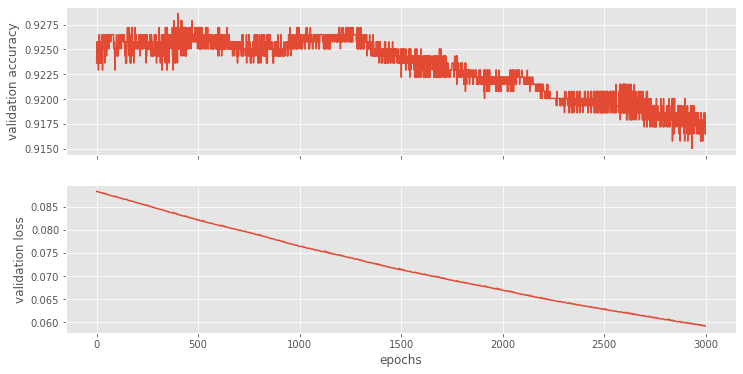

In [199]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")

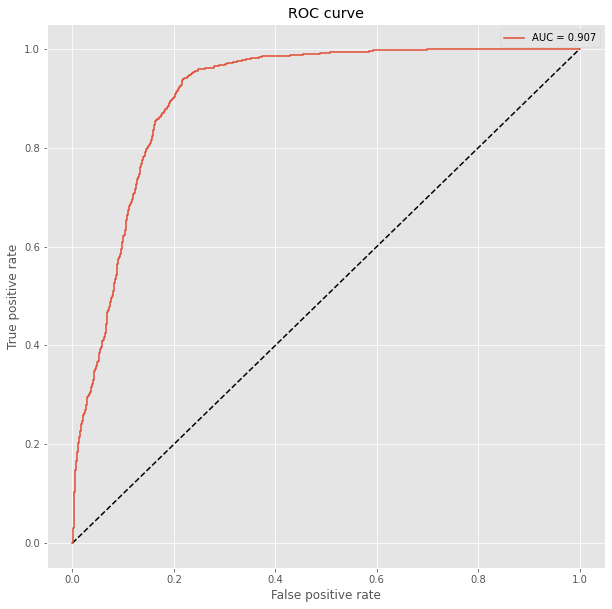

In [200]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [201]:
select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y_train = df['Insect']

X = np.asarray(df_train)
y = np.asarray(y_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

select_columns = df[["Hour","Sensor_beta","Sensor_gamma","Sensor_alpha_plus"]]
df_train = select_columns.copy()
y_train = df['Insect']

X = np.asarray(df_train)
y = np.asarray(y_train)
#y_trainM = df["Insect"]
#X_trainM = df.drop("Insect", axis="columns")
#X = np.asarray(X_trainM)
#y = np.asarray(y_trainM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

names = ['Lepidoptero', 'Himenoptera', 'Diptera']
"""
0 -> Lepidoptero
1 -> Himenoptera
2 -> Diptera
"""
feature_names = list(df_train.columns)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

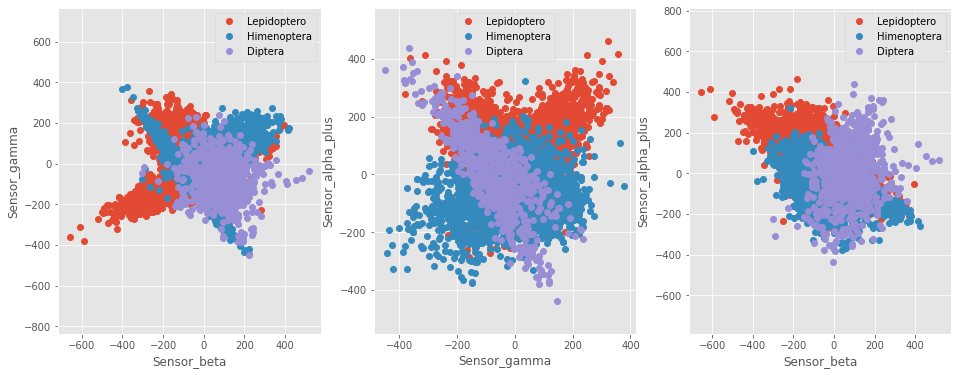

In [202]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 1], X_plot[:, 2], 
             linestyle='none', 
             marker='o', 
             label=target_name)

ax1.set_xlabel(feature_names[1])
ax1.set_ylabel(feature_names[2])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax3.plot(X_plot[:, 1], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax3.set_xlabel(feature_names[1])
ax3.set_ylabel(feature_names[3])
ax3.axis('equal')
ax3.legend()

In [203]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        #x = F.softmax(self.layer3(x), dim=1)
        x = self.layer3(x)

        return x

In [204]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [205]:
import tqdm

EPOCHS  = 1000
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|███████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.63it/s]


In [206]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())
preds

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,


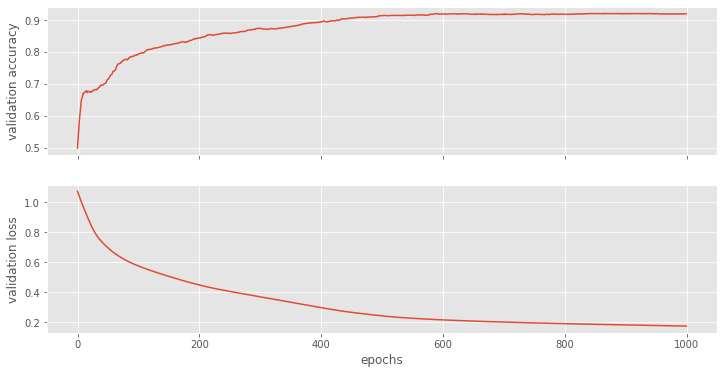

In [207]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

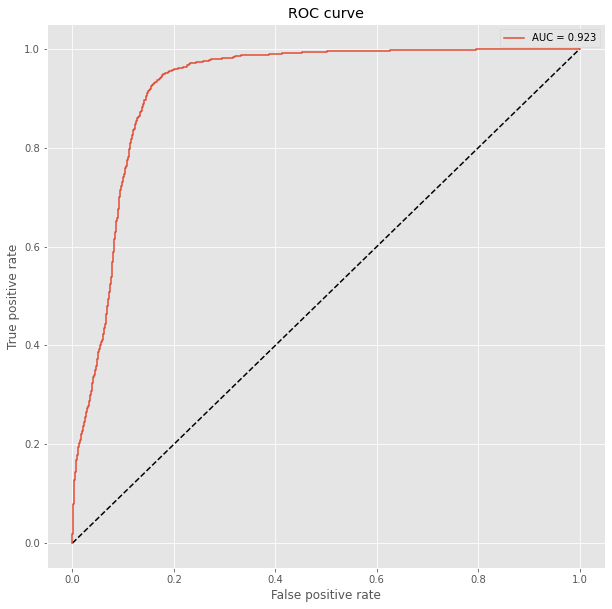

In [208]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
    
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();